In [1]:
from use_time_travel import graph

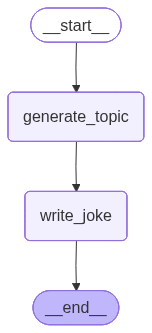

In [2]:
graph

In [3]:
import uuid

In [4]:
config = {"configurable": {"thread_id": uuid.uuid4()}}

In [5]:
state = graph.invoke({}, config)

In [6]:
state

{'topic': '“当蔬菜们决定开一场吐槽大会。”', 'joke': '黄瓜抱怨道：“你们总说敷我能补水，可谁关心过我天天被切片的脸！”'}

In [7]:
print(state['topic'])

“当蔬菜们决定开一场吐槽大会。”


In [8]:
print(state['joke'])

黄瓜抱怨道：“你们总说敷我能补水，可谁关心过我天天被切片的脸！”


In [9]:
states = list(graph.get_state_history(config))

In [10]:
for state in states:
    # print(state.next)
    # print(state.config['configurable']['checkpoint_id'])
    print(state)
    print()

StateSnapshot(values={'topic': '“当蔬菜们决定开一场吐槽大会。”', 'joke': '黄瓜抱怨道：“你们总说敷我能补水，可谁关心过我天天被切片的脸！”'}, next=(), config={'configurable': {'thread_id': '1191c17f-9f33-4d54-b997-38f5719dded5', 'checkpoint_ns': '', 'checkpoint_id': '1f0c5e0a-c660-625e-8002-a29087288673'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-11-20T07:15:20.419798+00:00', parent_config={'configurable': {'thread_id': '1191c17f-9f33-4d54-b997-38f5719dded5', 'checkpoint_ns': '', 'checkpoint_id': '1f0c5e0a-b1b4-6154-8001-fb2388dc5eb6'}}, tasks=(), interrupts=())

StateSnapshot(values={'topic': '“当蔬菜们决定开一场吐槽大会。”'}, next=('write_joke',), config={'configurable': {'thread_id': '1191c17f-9f33-4d54-b997-38f5719dded5', 'checkpoint_ns': '', 'checkpoint_id': '1f0c5e0a-b1b4-6154-8001-fb2388dc5eb6'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-11-20T07:15:18.252168+00:00', parent_config={'configurable': {'thread_id': '1191c17f-9f33-4d54-b997-38f5719dded5', 'checkpoint_ns': '', 'che

In [11]:
selected_state = states[1]

In [12]:
selected_state

StateSnapshot(values={'topic': '“当蔬菜们决定开一场吐槽大会。”'}, next=('write_joke',), config={'configurable': {'thread_id': '1191c17f-9f33-4d54-b997-38f5719dded5', 'checkpoint_ns': '', 'checkpoint_id': '1f0c5e0a-b1b4-6154-8001-fb2388dc5eb6'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-11-20T07:15:18.252168+00:00', parent_config={'configurable': {'thread_id': '1191c17f-9f33-4d54-b997-38f5719dded5', 'checkpoint_ns': '', 'checkpoint_id': '1f0c5e0a-9f4b-6075-8000-ef4aa2d9dd4a'}}, tasks=(PregelTask(id='546a0d27-0ce3-2707-fa4f-0880733b2a87', name='write_joke', path=('__pregel_pull', 'write_joke'), error=None, interrupts=(), state=None, result={'joke': '黄瓜抱怨道：“你们总说敷我能补水，可谁关心过我天天被切片的脸！”'}),), interrupts=())

In [13]:
new_config = graph.update_state(selected_state.config, values={"topic": "关于巧克力的笑话。"})

In [14]:
new_config

{'configurable': {'thread_id': '1191c17f-9f33-4d54-b997-38f5719dded5',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0c5e0e-75eb-6bb2-8002-3d8d4fd1ace3'}}

In [16]:
graph.get_state(new_config)

StateSnapshot(values={'topic': '关于巧克力的笑话。'}, next=('write_joke',), config={'configurable': {'thread_id': '1191c17f-9f33-4d54-b997-38f5719dded5', 'checkpoint_ns': '', 'checkpoint_id': '1f0c5e0e-75eb-6bb2-8002-3d8d4fd1ace3'}}, metadata={'source': 'update', 'step': 2, 'parents': {}}, created_at='2025-11-20T07:16:59.357688+00:00', parent_config={'configurable': {'thread_id': '1191c17f-9f33-4d54-b997-38f5719dded5', 'checkpoint_ns': '', 'checkpoint_id': '1f0c5e0a-b1b4-6154-8001-fb2388dc5eb6'}}, tasks=(PregelTask(id='60c65659-c8ba-773a-08d3-f6c638bf535b', name='write_joke', path=('__pregel_pull', 'write_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [17]:
graph.invoke(None, new_config)

{'topic': '关于巧克力的笑话。', 'joke': '我的巧克力呢？哦，原来它在我肚子里“留学”了！'}

In [15]:
for state in list(graph.get_state_history(config)):
    print(state.next, state.config['configurable']['checkpoint_id'])

('write_joke',) 1f0c5e0e-75eb-6bb2-8002-3d8d4fd1ace3
() 1f0c5e0a-c660-625e-8002-a29087288673
('write_joke',) 1f0c5e0a-b1b4-6154-8001-fb2388dc5eb6
('generate_topic',) 1f0c5e0a-9f4b-6075-8000-ef4aa2d9dd4a
('__start__',) 1f0c5e0a-9f43-6a72-bfff-0421d1c32fb3
